In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [28]:
# Find the most recent date in the data set.
recentdata = session.query(Measurement.date) \
    .order_by(Measurement.date.desc()).first()
recentdata

('2017-08-23')

In [45]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
last12mon = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-23") \
    .order_by(Measurement.date.desc()).all()
# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores
# precip = session.query(Measurement.prcp).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
new_df = pd.DataFrame(last12mon, columns=["date", "precipitation"])
new_df

,date,precipitation
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00
...,...,...
2225,2016-08-23,0.05
2226,2016-08-23,NaN
2227,2016-08-23,0.02
2228,2016-08-23,1.79


In [44]:
# Sort the dataframe by date
sort_df = new_df.sort_values(by="date")
sort_df = sort_df.reset_index(drop=True)
sort_df = sort_df.dropna()
sort_df.head()

,date,precipitation
0,2016-08-23,0.70
1,2016-08-23,0.00
2,2016-08-23,0.15
3,2016-08-23,1.79
5,2016-08-23,0.02


Text(0, 0.5, 'Precipitation')

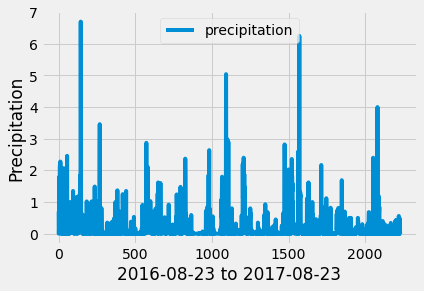

In [48]:
# Use Pandas Plotting with Matplotlib to plot the data
sort_df.plot()
plt.xlabel("2016-08-23 to 2017-08-23")
plt.ylabel("Precipitation")

In [47]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sort_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()